Problem 11:

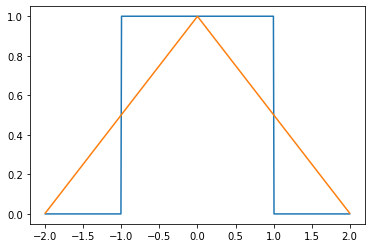

In [4]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt

def box(f):
    return   np.where(np.abs(f) <= 1,1, 0)
x_min = -2.0 # the effective range of function necessary
x_max = 2.0
n = 512 # number of points(will be doubled while zero padding)
x = np.linspace(x_min,x_max,n)
d = (x_max-x_min)/n 

f=box(x)

g=box(x)
f_pad=np.pad(f,(0,len(x)),mode='constant',constant_values=(0,0))

g_pad=np.pad(g,(0,len(x)),mode='constant',constant_values=(0,0))

plt.plot(x,f)
convolve = np.zeros(2*(n-1),dtype = np.float64)
convolve = (d/2.0)*np.sqrt(2*n-1)*((ft.ifft(ft.fft(f_pad,norm = 'ortho')*ft.fft(g_pad,norm = 'ortho'),norm = 'ortho')))
plt.plot(np.linspace(x_min,x_max,n-1),convolve[(n-1)-n//2+1:(n-1)+n//2].real)


